<!-- # CNN autoencoder and Clustering from MTRX data

Use this notebook to load Scienta Omicron Matrix format SPM data and create standardised images for machine learning training and analysis. The code can generate both JPG image data, useful for manually checking the data, and windowed numpy data that can be loaded into ML models. 

The notebook then creates an autoencoder for training on a large dataset, followed by KMEANS clustering. 

**Author**: Steven R. Schofield  
**Created**: November, 2024 -->

# CASTEP - Si lattice parameter optimisations
## Steven R. Schofield (Universtiy College London) May 2025

### Load required modules

In [1]:
import sys
from pathlib import Path

# Define candidate paths using Path objects
module_path_list = [
    Path('/Users/steven/academic-iCloud/Python/modules'),
    Path('/hpc/srs/Python/modules')
]

data_path_list = [
    Path('/Users/steven/academic-iCloud/Calculations/castep/'),
    Path('/hpc/srs/castep')
]

# Resolve actual paths
module_path = next((p for p in module_path_list if p.exists()), None)
data_path = next((p for p in data_path_list if p.exists()), None)

# Check and report missing paths
if module_path is None:
    print("Error: Could not locate a valid module path.")
if data_path is None:
    print("Error: Could not locate a valid data path.")

if module_path is None or data_path is None:
    sys.exit(1)

# Add module_path to sys.path if needed
if str(module_path) not in sys.path:
    sys.path.insert(0, str(module_path))

# Print resolved paths
print(f"module_path = {module_path}")
print(f"data_path = {data_path}")

module_path = /hpc/srs/Python/modules
data_path = /hpc/srs/castep


In [2]:
# # Ensure modules are reloaded 
%load_ext autoreload
%autoreload 2

# Import standard modules
import numpy as np
import pandas as pd
import os

# Import custom module
import SRSCALCUTILS.castep_tools as ct

#from IPython.display import display, Image as StaticImage

### Job paths

In [3]:
# Parameters for windows creation
# General
job_folder = 'work-2025/si_lattice_apollo'
job_path = data_path / job_folder
verbose = False             # Set this True to print out more information

# Print resolved paths
print(f"job_path = {job_path}")

job_path = /hpc/srs/castep/work-2025/si_lattice_apollo


### Create CASTEP input files

In [4]:
params = {'task' : 'geomopt',
          'xc_functional'           : 'PBE',
#          'basis_precision'         : 'precise',         #coarse | medium | fine | precise OR 'cut_off_energy' : 750,
          'cut_off_energy'          : 700,
          'spin_polarised'          : 'false',
          'write_cell_structure'    : 'true',
          'charge'                  : 0,
          'nextra_bands'            : 6,
          'geom_energy_tol'         : 0.00005,          # default: 0.00005 eV 
          'geom_disp_tol'           : 0.002,            # default: 0.002 Ang.
          'geom_max_iter'           : 100,              # default: 30
          'geom_convergence_win'    : 2,                # default: 2
          'max_scf_cycles'          : 300               # default: 30
          }              

In [5]:
# 

filename = "silicon"
title = "silicon lattice parameter optimisation"

na=1
nb=1
nc=1

lattice_cart = np.array([
            [2.7,     2.7,     0.0],
            [2.7,     0.0,     2.7],
            [0.0,     2.7,     2.7,]
        ])

positions_frac = np.array([
            ['Si', 0.0,  0.0,  0.0],
            ['Si', 0.25,  0.25,  0.25],
        ])

constraints = np.array([
            [1,  1,  1],
            [0,  0,  0]
        ])

kpoints_mp_grid = np.array([4, 4, 4])

fix_all_ions = True
symmetry_generate=False
symmetry_tol = 0.01

In [6]:
# If it doesn’t exist, create it (including any missing parent folders)
if not os.path.isdir(job_path):
    os.makedirs(job_path, exist_ok=True)

# Now safely switch into it
os.chdir(job_path)

print("Now in:", os.getcwd())
print("Files:", os.listdir())

Now in: /hpc/srs/castep/work-2025/si_lattice_apollo
Files: []


### Convergence with cut off energy

Wrote param file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-200.param
Wrote cell file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-200.cell
Wed 21 May 09:54:29 BST 2025

No problem is insoluble.
		-- Dr. Janet Wallace, "The Deadly Years", stardate 3479.4


                         FILE: silicon-200.castep                         
   PATH: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-200.castep   

No warnings found in: silicon-200.castep
  full path: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-200.castep


,Parameter,Value
0,plane wave basis set cut-off,200.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


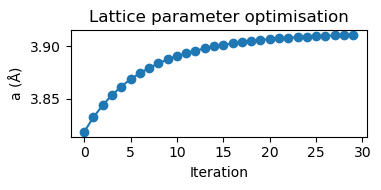

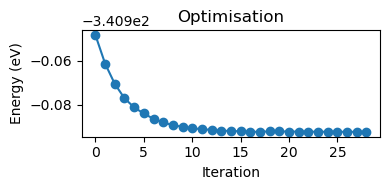

Final unit cell
	 [2.765239, 2.765239, 0.0]
	 [2.765239, 0.0, 2.765239]
	 [0.0, 2.765239, 2.765239]
Final a = 3.9106 b = 3.9106 c = 3.9106 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-300.param
Wrote cell file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-300.cell
Wed 21 May 09:54:43 BST 2025

Genius is ten percent inspiration and fifty percent capital gains.


                         FILE: silicon-300.castep                         
   PATH: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-300.castep   

No warnings found in: silicon-300.castep
  full path: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-300.castep


,Parameter,Value
0,plane wave basis set cut-off,300.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


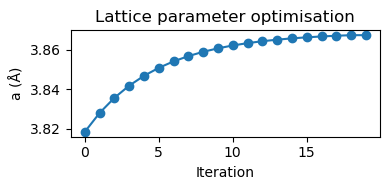

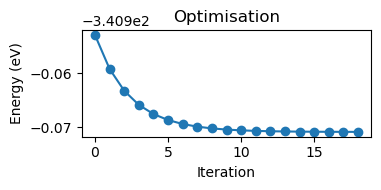

Final unit cell
	 [2.7346998, 2.7346998, -0.0]
	 [2.7346998, -0.0, 2.7346998]
	 [-0.0, 2.7346998, 2.7346998]
Final a = 3.8674 b = 3.8674 c = 3.8674 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-400.param
Wrote cell file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-400.cell
Wed 21 May 09:54:56 BST 2025

Each new user of a new system uncovers a new class of bugs.
		-- Kernighan


                         FILE: silicon-400.castep                         
   PATH: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-400.castep   

No warnings found in: silicon-400.castep
  full path: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-400.castep


,Parameter,Value
0,plane wave basis set cut-off,400.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


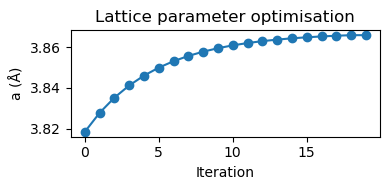

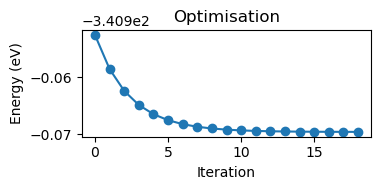

Final unit cell
	 [2.7336132, 2.7336132, -0.0]
	 [2.7336132, -0.0, 2.7336132]
	 [-0.0, 2.7336132, 2.7336132]
Final a = 3.8659 b = 3.8659 c = 3.8659 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-500.param
Wrote cell file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-500.cell
Wed 21 May 09:55:11 BST 2025

Mathematics, rightly viewed, possesses not only truth but supreme beauty --
a beauty cold and austere, like that of a sculpture, without appeal to any
part of our weaker nature, without the gorgeous trapping of painting or music,
yet sublimely pure, and capable of a stern perfection such as only the
greatest art can show.  The true spirit of delight, the exaltation, the sense
of being more than man, which is the touchstone of the highest excellence, is
to be found in mathematics as surely as in poetry.
		-- Bertrand Russell


                         FILE: silicon-500.castep                         
   

,Parameter,Value
0,plane wave basis set cut-off,500.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


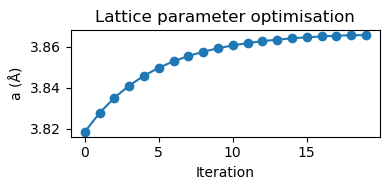

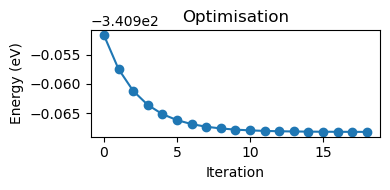

Final unit cell
	 [2.7333532, 2.7333532, -0.0]
	 [2.7333532, -0.0, 2.7333532]
	 [-0.0, 2.7333532, 2.7333532]
Final a = 3.8655 b = 3.8655 c = 3.8655 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-600.param
Wrote cell file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-600.cell
Wed 21 May 09:55:27 BST 2025

What's the MATTER Sid? ... Is your BEVERAGE unsatisfactory?


                         FILE: silicon-600.castep                         
   PATH: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-600.castep   

No warnings found in: silicon-600.castep
  full path: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-600.castep


,Parameter,Value
0,plane wave basis set cut-off,600.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


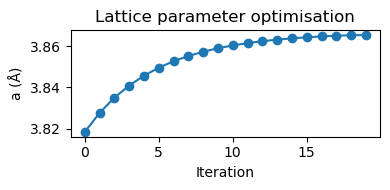

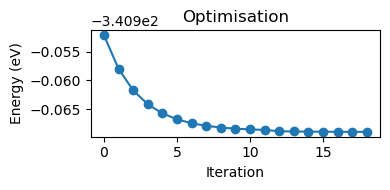

Final unit cell
	 [2.7332541, 2.7332541, -0.0]
	 [2.7332541, -0.0, 2.7332541]
	 [-0.0, 2.7332541, 2.7332541]
Final a = 3.8654 b = 3.8654 c = 3.8654 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-700.param
Wrote cell file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-700.cell
Wed 21 May 09:55:46 BST 2025

A computer lets you make more mistakes faster than any other invention,
with the possible exceptions of handguns and Tequilla.
		-- Mitch Ratcliffe


                         FILE: silicon-700.castep                         
   PATH: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-700.castep   

No warnings found in: silicon-700.castep
  full path: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-700.castep


,Parameter,Value
0,plane wave basis set cut-off,700.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


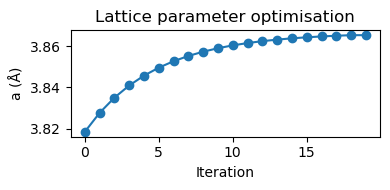

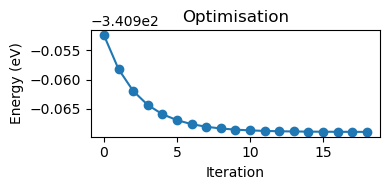

Final unit cell
	 [2.7332602, 2.7332602, -0.0]
	 [2.7332602, -0.0, 2.7332602]
	 [-0.0, 2.7332602, 2.7332602]
Final a = 3.8654 b = 3.8654 c = 3.8654 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-800.param
Wrote cell file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-800.cell
Wed 21 May 09:56:06 BST 2025

Committee Rules:
	(1) Never arrive on time, or you will be stamped a beginner.
	(2) Don't say anything until the meeting is half over; this
	    stamps you as being wise.
	(3) Be as vague as possible; this prevents irritating the
	    others.
	(4) When in doubt, suggest that a subcommittee be appointed.
	(5) Be the first to move for adjournment; this will make you
	    popular -- it's what everyone is waiting for.


                         FILE: silicon-800.castep                         
   PATH: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-800.castep   

No warnings found in: silicon-800.caste

,Parameter,Value
0,plane wave basis set cut-off,800.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


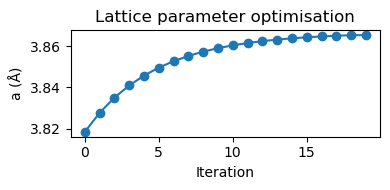

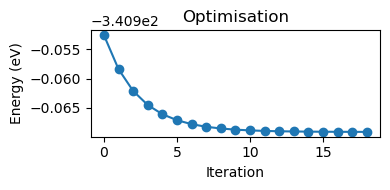

Final unit cell
	 [2.7332049, 2.7332049, -0.0]
	 [2.7332049, -0.0, 2.7332049]
	 [-0.0, 2.7332049, 2.7332049]
Final a = 3.8653 b = 3.8653 c = 3.8653 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-900.param
Wrote cell file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-900.cell
Wed 21 May 09:56:29 BST 2025

Isn't this my STOP?!


                         FILE: silicon-900.castep                         
   PATH: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-900.castep   

No warnings found in: silicon-900.castep
  full path: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-900.castep


,Parameter,Value
0,plane wave basis set cut-off,900.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


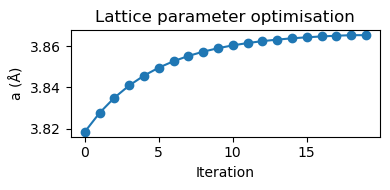

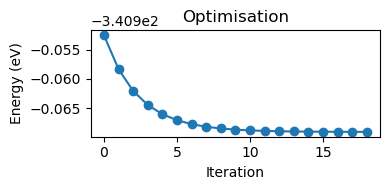

Final unit cell
	 [2.7332356, 2.7332356, -0.0]
	 [2.7332356, -0.0, 2.7332356]
	 [-0.0, 2.7332356, 2.7332356]
Final a = 3.8654 b = 3.8654 c = 3.8654 alpha = 60.0000 beta = 60.0000 gamma = 60.0000

Wrote param file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-1000.param
Wrote cell file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-1000.cell
Wed 21 May 09:56:56 BST 2025

Never trust an operating system.


                         FILE: silicon-1000.castep                         
   PATH: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-1000.castep   

No warnings found in: silicon-1000.castep
  full path: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-1000.castep


,Parameter,Value
0,plane wave basis set cut-off,1000.0000 eV
1,finite basis set correction,automatic
2,number of electrons,8.0
3,net charge of system,0.0
4,number of bands,10.0
5,total energy / atom convergence tol.,0.1000E-04 eV
6,eigen-energy convergence tolerance,0.1000E-05 eV
7,max force / atom convergence tol.,ignored
8,convergence tolerance window,2 steps
9,smearing scheme,Gaussian


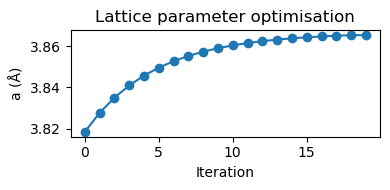

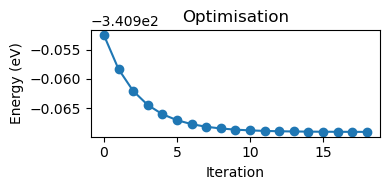

Final unit cell
	 [2.7332361, 2.7332361, -0.0]
	 [2.7332361, -0.0, 2.7332361]
	 [-0.0, 2.7332361, 2.7332361]
Final a = 3.8654 b = 3.8654 c = 3.8654 alpha = 60.0000 beta = 60.0000 gamma = 60.0000



In [7]:
var_list = [200,300,400,500,600,700,800,900,1000]
alist = []
energy_list = []

!export OMP_NUM_THREADS=2

for var in var_list:
    params['cut_off_energy'] = var
    filename = f"silicon-{var}"
    _ = ct.write_param_file(
        params,
        title = title,
        filename=filename,
        path=job_path,
        display_file=False
        )
    _ = ct.write_cell_file(
        title = title,
        path=job_path,
        filename=filename,
        na=na,
        nb=nb,
        nc=nc,
        lattice_cart=lattice_cart,
        positions_frac=positions_frac,
        constraints=constraints,
        fix_all_ions=True,
        symmetry_generate=symmetry_generate,
        symmetry_tol = symmetry_tol,
        kpoints_mp_grid=kpoints_mp_grid,
        display_file=False
    )

    !bash -l -c "mpirun -np 32 castep.mpi {filename}"

    castep_path = job_path / f"{filename}.castep"

    warnings = ct.get_warnings(castep_path, verbose=True)

    calculation_parameters = ct.get_calculation_parameters(castep_path)
    calculation_parameters_df = pd.DataFrame(list(calculation_parameters.items()), columns=['Parameter', 'Value'])

    lattice_optimisation = ct.get_lattice_parameters(castep_path)
    a_values = [blk['a'] for blk in lattice_optimisation]

    unit_cell, a, b, c, alpha, beta, gamma = ct.get_final_lattice_parameters(castep_path)

    energy_optimisation = ct.get_LBFGS_energies(castep_path)
    energies = [val for _, val in energy_optimisation]

    ct.print_filename(castep_path)
    print(warnings)
    display(calculation_parameters_df)

    ct.plot_sequence(a_values, xlabel='Iteration', ylabel='a (Å)', title='Lattice parameter optimisation')
    ct.plot_sequence(energies, xlabel='Iteration', ylabel='Energy (eV)', title='Optimisation')

    print(f"Final unit cell")
    for vector in unit_cell:
        print(f"\t {vector}")
    print(f"Final a = {a:.4f} b = {b:.4f} c = {c:.4f} alpha = {alpha:.4f} beta = {beta:.4f} gamma = {gamma:.4f}\n")

    alist.append(a)
    energy_list.append(energies[-1])


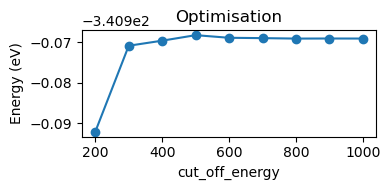

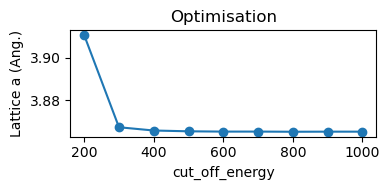

,Cut off energy (eV),Lattice constant (Å),Energy
0,200,3.910639,-340.992124
1,300,3.867450,-340.970852
2,400,3.865913,-340.969599
3,500,3.865545,-340.968237
4,600,3.865405,-340.968886
5,700,3.865414,-340.968971
6,800,3.865335,-340.969083
7,900,3.865379,-340.969064
8,1000,3.865380,-340.969076


In [8]:

ct.plot_sequence(energy_list, var_list, xlabel='cut_off_energy', ylabel='Energy (eV)', title='Optimisation')
ct.plot_sequence(alist, var_list, xlabel='cut_off_energy', ylabel='Lattice a (Ang.)', title='Optimisation')

import pandas as pd

df = pd.DataFrame({
    "Cut off energy (eV)": var_list,
    "Lattice constant (Å)": alist,
    "Energy": energy_list,
})

display( df)

### Convergence with nextrabands

In [9]:
var_list = [0,2,4,6,8,10,12,14]
alist = []
energy_list = []
params['cut_off_energy'] = 700

for var in var_list:
    params['nextra_bands'] = var
    filename = f"silicon-nextra-{var}"
    _ = ct.write_param_file(
        params,
        title = title,
        filename=filename,
        path=job_path,
        display_file=False
        )
    _ = ct.write_cell_file(
        title = title,
        path=job_path,
        filename=filename,
        na=na,
        nb=nb,
        nc=nc,
        lattice_cart=lattice_cart,
        positions_frac=positions_frac,
        constraints=constraints,
        fix_all_ions=True,
        symmetry_generate=symmetry_generate,
        symmetry_tol = symmetry_tol,
        kpoints_mp_grid=kpoints_mp_grid,
        display_file=False
    )

    !zsh -l -c "castepmpi {filename}"

    castep_path = job_path / f"{filename}.castep"

    warnings = ct.get_warnings(castep_path, verbose=True)

    calculation_parameters = ct.get_calculation_parameters(castep_path)
    calculation_parameters_df = pd.DataFrame(list(calculation_parameters.items()), columns=['Parameter', 'Value'])

    lattice_optimisation = ct.get_lattice_parameters(castep_path)
    a_values = [blk['a'] for blk in lattice_optimisation]

    unit_cell, a, b, c, alpha, beta, gamma = ct.get_final_lattice_parameters(castep_path)

    energy_optimisation = ct.get_LBFGS_energies(castep_path)
    energies = [val for _, val in energy_optimisation]

    ct.print_filename(castep_path)
    print(warnings)
    display(calculation_parameters_df)

    ct.plot_sequence(a_values, xlabel='Iteration', ylabel='a (Å)', title='Lattice parameter optimisation')
    ct.plot_sequence(energies, xlabel='Iteration', ylabel='Energy (eV)', title='Optimisation')

    print(f"Final unit cell")
    for vector in unit_cell:
        print(f"\t {vector}")
    print(f"Final a = {a:.4f} b = {b:.4f} c = {c:.4f} alpha = {alpha:.4f} beta = {beta:.4f} gamma = {gamma:.4f}\n")

    alist.append(a)
    energy_list.append(energies[-1])


Wrote param file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-nextra-0.param
Wrote cell file to: /hpc/srs/castep/work-2025/si_lattice_apollo/silicon-nextra-0.cell
zsh:1: command not found: castepmpi


FileNotFoundError: [Errno 2] No such file or directory: '/hpc/srs/castep/work-2025/si_lattice_apollo/silicon-nextra-0.castep'

In [ ]:
ct.plot_sequence(energy_list, var_list, xlabel='nextrabands', ylabel='Energy (eV)', title='Optimisation')
ct.plot_sequence(alist, var_list, xlabel='nextrabands', ylabel='Lattice a (Ang.)', title='Optimisation')

import pandas as pd

df = pd.DataFrame({
    "nextrabands": var_list,
    "Lattice constant (Å)": alist,
    "Energy": energy_list,
})

display( df)